# Subjectivity Analysis

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/subjectivity](https://github.com/huseinzol05/Malaya/tree/master/example/subjectivity).
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.68 s, sys: 1.17 s, total: 5.84 s
Wall time: 6.97 s


### Explanation

Positive subjectivity: based on or influenced by personal feelings, tastes, or opinions. Can be a positive or negative sentiment.

Negative subjectivity: based on a report or a fact. Can be a positive or negative sentiment.

In [2]:
negative_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
positive_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is False.**

### Load multinomial model

In [4]:
model = malaya.subjectivity.multinomial()
model.predict_proba([positive_text,negative_text])

[{'negative': 0.008413186333328921,
  'positive': 0.15868136666711186,
  'neutral': 0.8329054469995593},
 {'negative': 0.5812425768208322,
  'positive': 0.004187574231791736,
  'neutral': 0.41456984894737603}]

In [6]:
model.predict_proba([positive_text,negative_text], add_neutral = False)

[{'negative': 0.420659316666446, 'positive': 0.5793406833335559},
 {'negative': 0.7906212884104161, 'positive': 0.2093787115895868}]

### List available Transformer models

In [2]:
malaya.subjectivity.available_transformer()

{'bert': ['425.6 MB', 'accuracy: 0.916'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.903'],
 'albert': ['48.6 MB', 'accuracy: 0.903'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.894'],
 'xlnet': ['446.5 MB', 'accuracy: 0.917'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.908']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#subjectivity-analysis

**You might want to use Tiny-Albert, a very small size, 22.4MB, but the accuracy is still on the top notch.**

### Load ALBERT model

In [9]:
model = malaya.subjectivity.transformer(model = 'albert')

INFO:tensorflow:loading sentence piece model


#### Predict batch of strings

In [10]:
model.predict_proba([negative_text, positive_text])

[{'negative': 0.9956738, 'positive': 4.326162e-05, 'neutral': 0.0042829514},
 {'negative': 0.9615872, 'positive': 0.00038412912, 'neutral': 0.038028657}]

#### Open subjectivity visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [12]:
model.predict_words(negative_text)

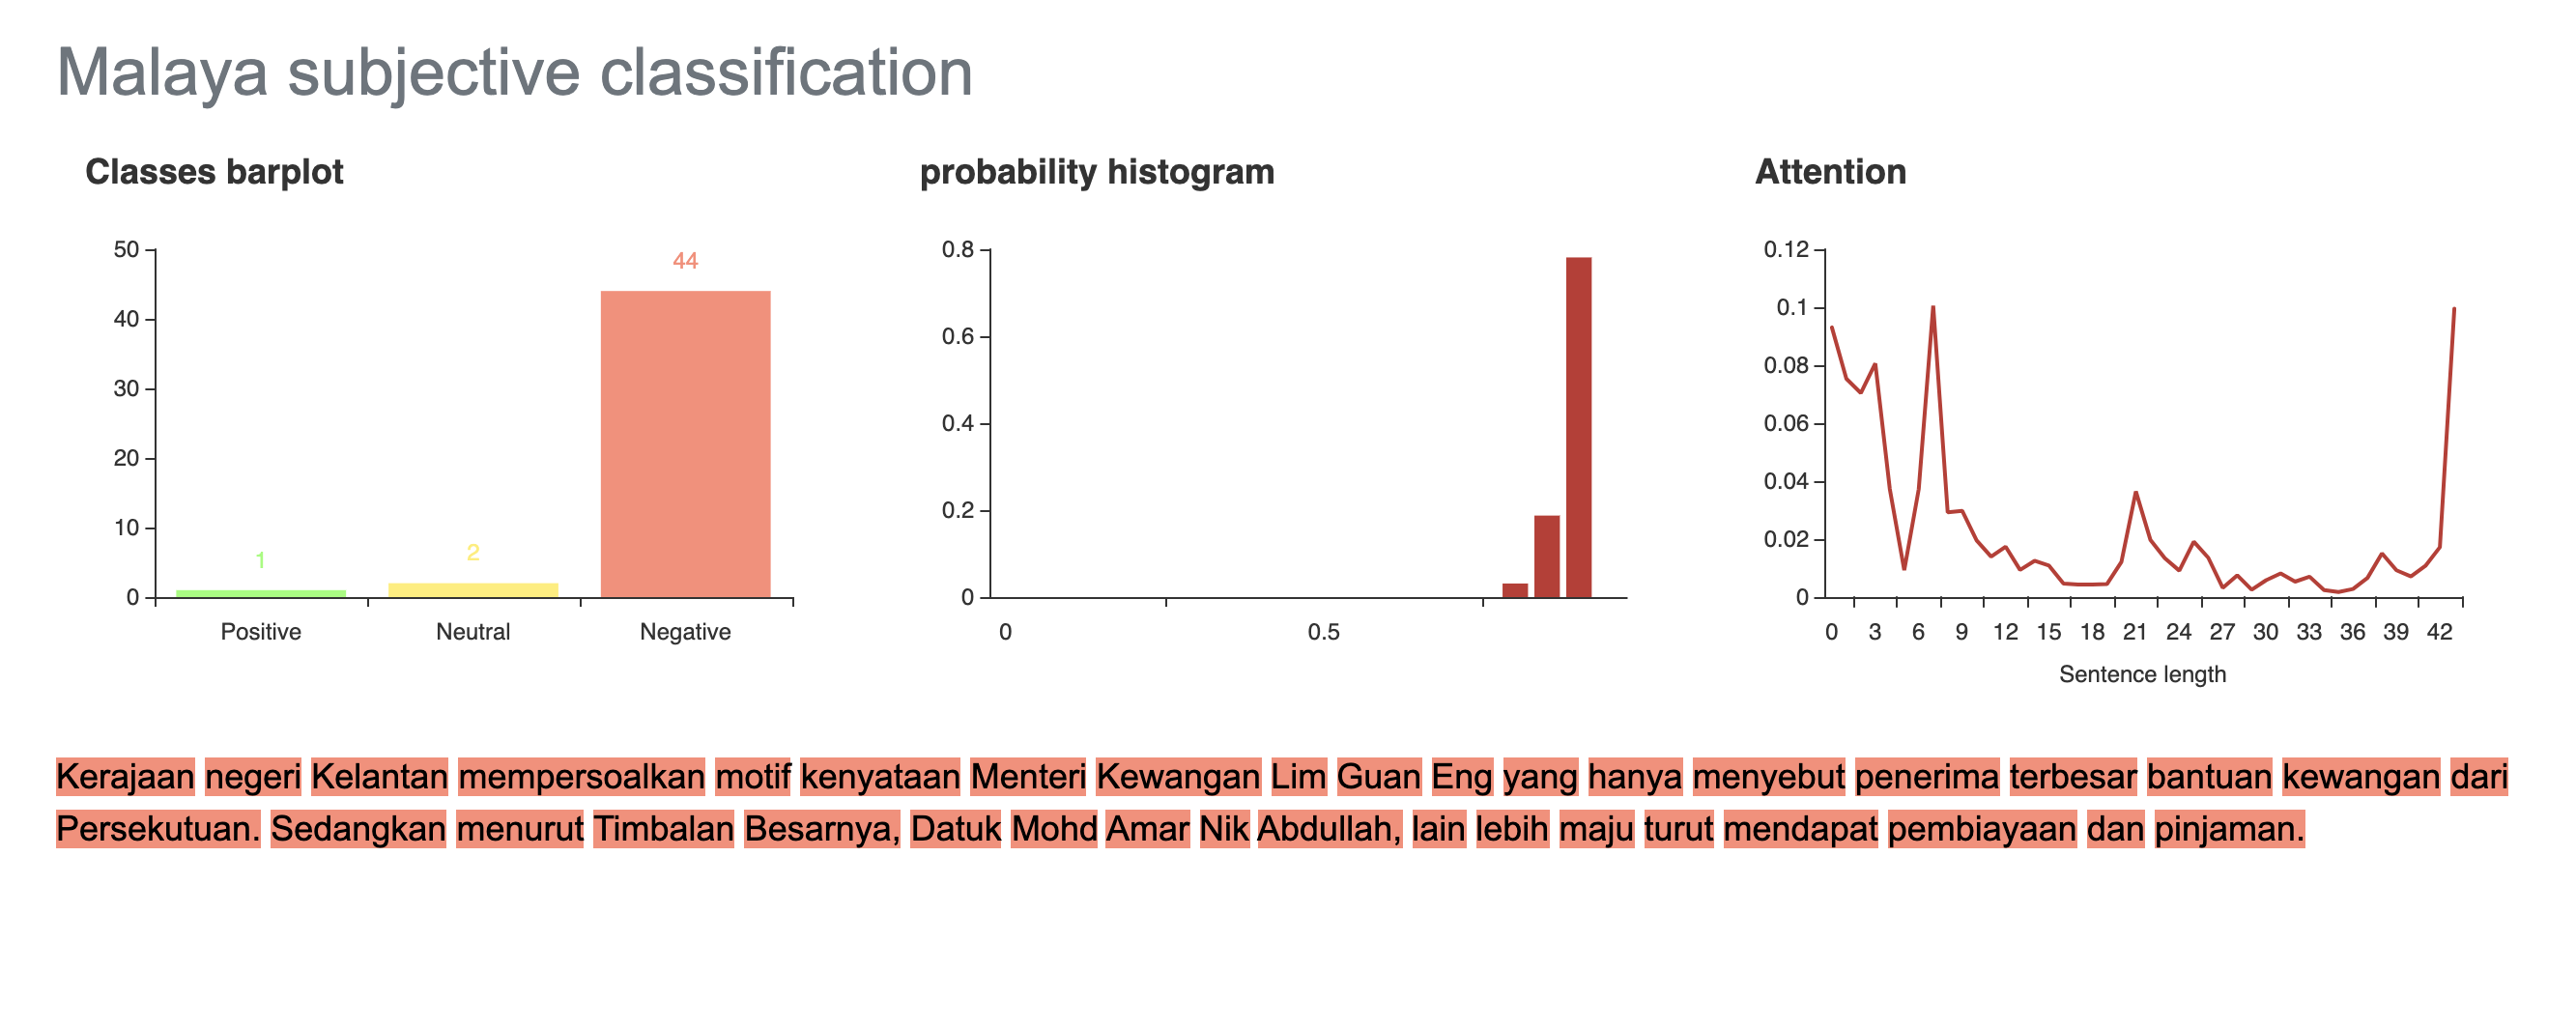

In [13]:
from IPython.core.display import Image, display

display(Image('subjective-dashboard.png', width=800))

### Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [6]:
multinomial = malaya.subjectivity.multinomial()
alxlnet = malaya.subjectivity.transformer(model = 'alxlnet')

In [12]:
malaya.stack.predict_stack([multinomial, model, alxlnet], [positive_text])

[{'negative': 0.19735892950073536,
  'positive': 0.003119166818228667,
  'neutral': 0.1160071232668102}]

In [13]:
malaya.stack.predict_stack([multinomial, model, alxlnet], [positive_text], add_neutral = False)

[{'negative': 0.7424157666636825, 'positive': 0.04498033797670938}]